In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
housing=pd.read_csv('california_housing.csv')

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [62]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


Here we can see bedrooms data is missing so we'll deal with it later

In [63]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     7276
INLAND        5263
NEAR OCEAN    2124
NEAR BAY      1847
ISLAND           2
Name: ocean_proximity, dtype: int64

It is clear that ocean_proximity is not ordinal variable so we'll perform one hot encoding

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3eafaf7d0>,
      dtype=object)

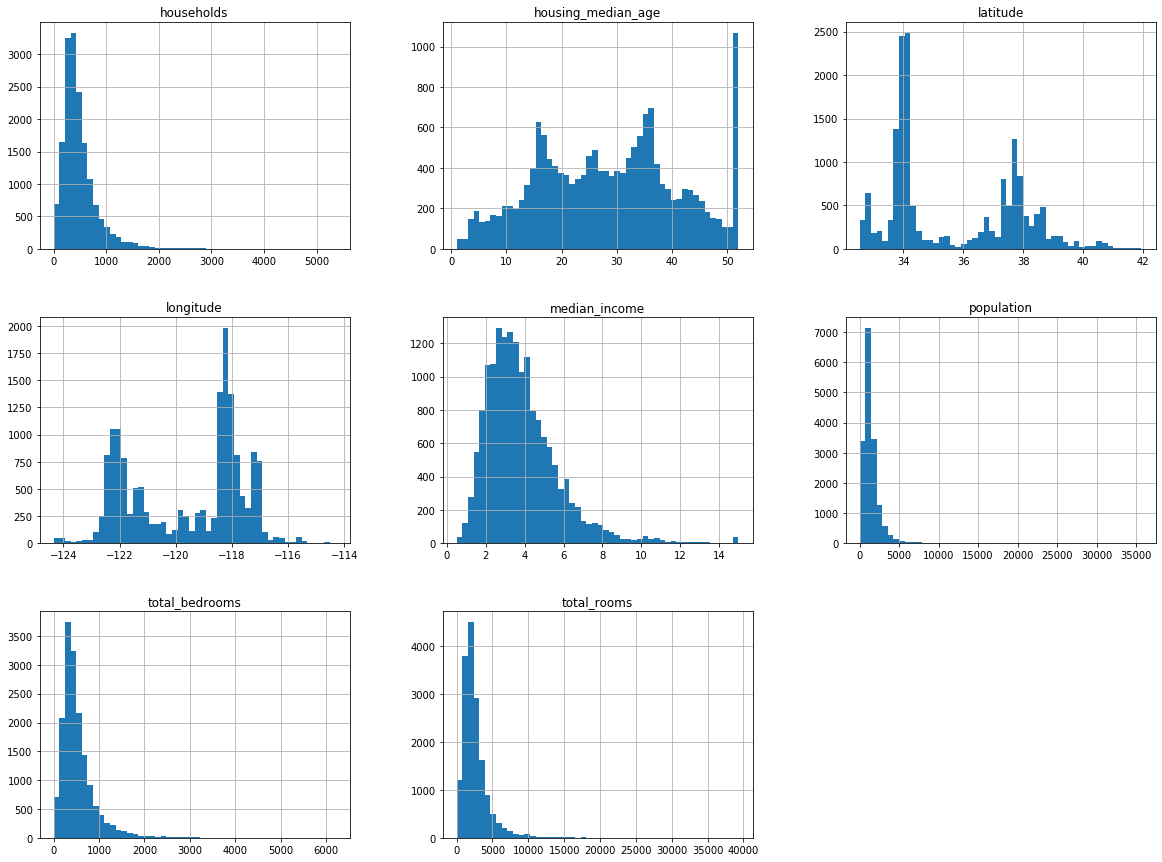

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(figsize=(20,15),bins=50)

Here we can see the distribution of the columns and most of them are skewed

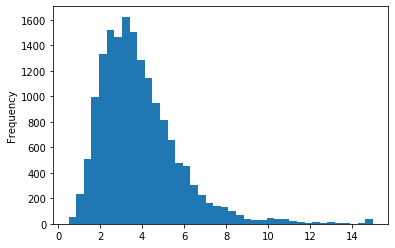

In [65]:
housing['median_income'].plot(kind='hist',bins=40)

Median income is one of the most import contributor to the median house value so we need to split the data 
according to median_income.Since, it is continuous variable we need to divide it in bins without affecting the 
distribution for stratified sampling

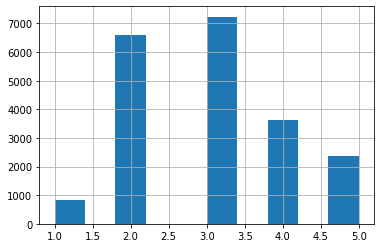

In [8]:
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])
housing['income_cat'].hist()

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42,stratify=housing['income_cat'])

In [10]:
train_set['income_cat'].value_counts()/len(train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [11]:
for set in (train_set,test_set):
    set.drop('income_cat',axis=1,inplace=True)

/home/aakashkhadka/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [12]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


In [13]:
housing=train_set.copy()

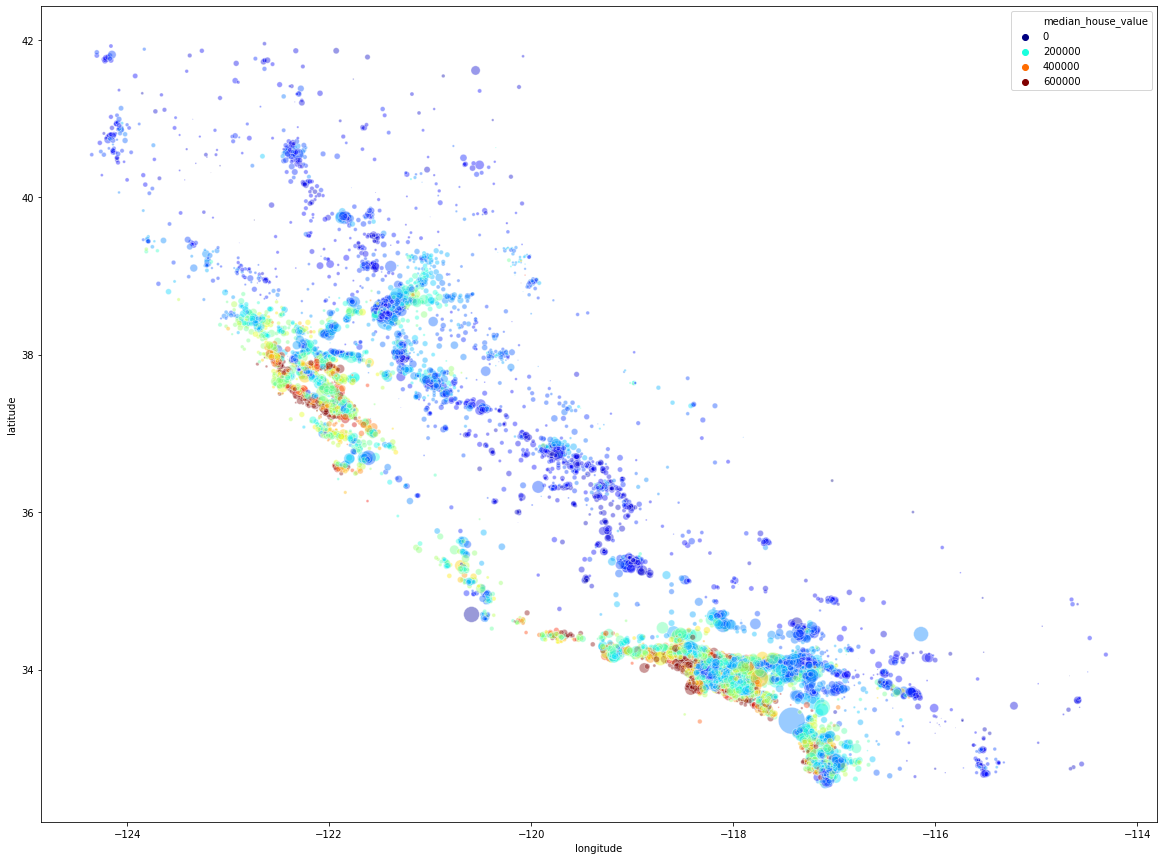

In [14]:
plt.figure(figsize=(20,15))
sns.scatterplot(data=housing,x='longitude',y='latitude',alpha=0.4,hue='median_house_value',palette='jet',s=housing['population']/50)

In [16]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

### Experimenting the new features

In [25]:
housing['rooms_per_house']=housing['total_rooms']/housing['households']
housing['bedroom_per_rooms']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [26]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_house             0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedroom_per_rooms          -0.259984
Name: median_house_value, dtype: float64

In [27]:
housing=train_set.drop('median_house_value',axis=1)
housing_label=train_set['median_house_value'].copy()

In [50]:
room_ix,bedroom_ix,population_ix,house_ix=3,4,5,6

from sklearn.base import BaseEstimator,TransformerMixin
class CustomTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedroom_per_room=True):
        self.add_bedroom_per_room=add_bedroom_per_room
        
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        room_per_household=X[:,room_ix]/X[:,house_ix]
        room_per_population=X[:,room_ix]/X[:,population_ix]
        if self.add_bedroom_per_room:
            bedroom_per_room=X[:,bedroom_ix]/X[:,room_ix]
            return np.c_[X,room_per_household,room_per_population,bedroom_per_room]
        else:
            return np.c_[X,room_per_household,room_per_population]
        
    

In [38]:
housing_num=housing.select_dtypes(exclude='O')
housing_cat=housing.select_dtypes(include='O')

In [43]:
num_cols=housing_num.columns.tolist()
cat_cols=housing_cat.columns.tolist()
num_cols,cat_cols

(['longitude',
  'latitude',
  'housing_median_age',
  'total_rooms',
  'total_bedrooms',
  'population',
  'households',
  'median_income'],
 ['ocean_proximity'])

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
pipe1=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('custom',CustomTransformer()),
    ('scale',StandardScaler())
])

In [54]:
pipe1.fit_transform(housing_num)

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
         0.18575356,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
         0.19440151, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
         0.08449912,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
         0.27274564, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
        -0.44247118, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
         0.37551419,  0.10180567]])

In [56]:
pipe2=Pipeline(steps=[
    ('onehot',OneHotEncoder())
])

In [58]:
pipe2.fit_transform(housing_cat)

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [59]:
from sklearn.compose import ColumnTransformer
full_pipeline=ColumnTransformer([
    ('num_transformer',pipe1,num_cols),
    ('cat_transformer',pipe2,cat_cols)
])

In [67]:
housing_prepared=full_pipeline.fit_transform(housing)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
linreg=LinearRegression()
linreg.fit(housing_prepared,housing_label)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
pred=linreg.predict(housing_prepared)
print("RMSE:",np.sqrt(MSE(housing_label,pred)))

RMSE: 67325.81195596432
